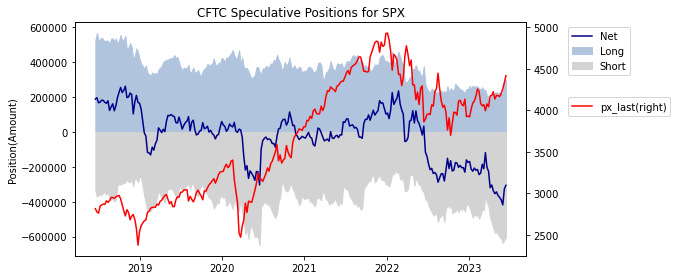

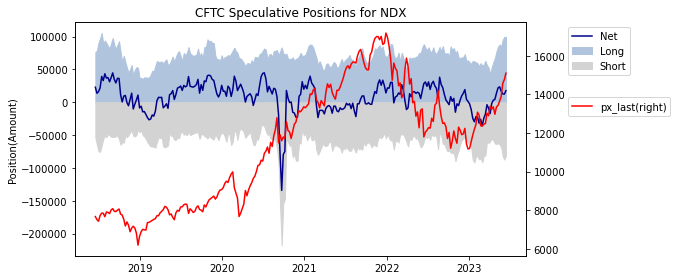

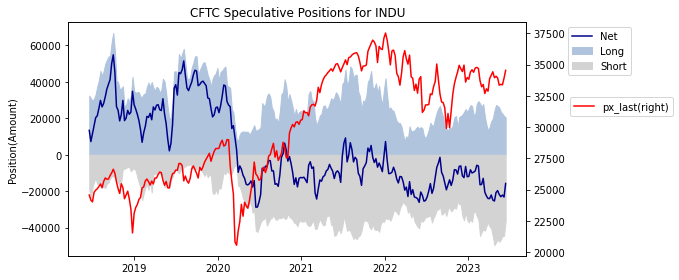

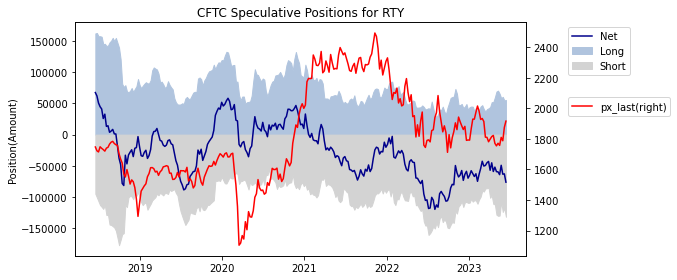

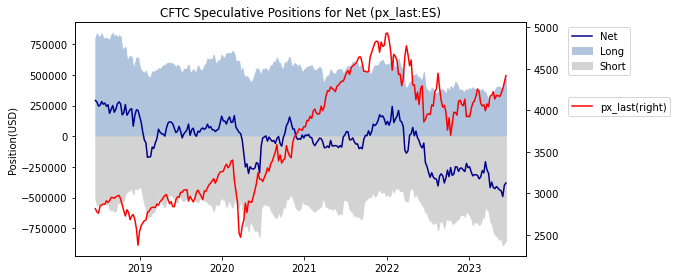

<Figure size 432x288 with 0 Axes>

In [1]:
%matplotlib inline
%run CFTC

<br>

## The following is the same information as in CFTC.py

In [2]:
import blpapi
from xbbg import blp
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# import pdblp
# con = pdblp.BCon(timeout=5000)
# con.start()
# https://pythondatascience.plavox.info/wp-content/uploads/2016/06/colorpalette.png

In [3]:
List = [
    ['ES', 'Index', 'IMM0E', 'IMMTE'],
    ['NQ', 'Index', 'IMM3N', 'IMMPN'],
    ['DM', 'Index', 'CBT1D', 'CBTOD'],
    ['RTY', 'Index', 'CFF6T', 'CFC6T'],
    ['HWA', 'Index', 'CF30C', 'CC30C'],
    ['HWB', 'Index', 'CF30D', 'CC30D'],
    ['HWI', 'Index', 'CF30E', 'CC30E'],
    ['HWR', 'Index', 'CF30F', 'CC30F']
]

List = pd.DataFrame(List, columns=["Symbol", "YK", "Fut", "Fut&Option"])  # YK=YellowKey
S = List["Symbol"]
T = S + "A " + List["YK"]
BDP = blp.bdp(tickers=T.tolist(), flds=["name", "undl_spot_ticker", "exch_code", "contract_value"]).loc[T, :]

List[["Name", "Undl", "Exch", "Contract"]] = np.array(BDP)
List["MicroMini"] = "-"
List["Adj"] = "-"
for i in range(len(List)):
    tmp = List.loc[List["Undl"]==List.loc[i,"Undl"],"Symbol"].values[1]
    if tmp != List.loc[i,"Symbol"]:
        List.loc[i,"MicroMini"] = tmp
        List.loc[i,"Adj"] = 0.1
List

,Symbol,YK,Fut,Fut&Option,Name,Undl,Exch,Contract,MicroMini,Adj
0,ES,Index,IMM0E,IMMTE,S&P500 EMINI FUT Sep23,SPX,CME,222687.50,HWA,0.1
1,NQ,Index,IMM3N,IMMPN,NASDAQ 100 E-MINI Sep23,NDX,CME,305360.00,HWB,0.1
2,DM,Index,CBT1D,CBTOD,DJIA MINI e-CBOT Sep23,INDU,CBT,173020.00,HWI,0.1
3,RTY,Index,CFF6T,CFC6T,E-Mini Russ 2000 Sep23,RTY,CME,94670.00,HWR,0.1
4,HWA,Index,CF30C,CC30C,SP500 MIC EMIN FUTSep23,SPX,CME,22268.75,-,-
5,HWB,Index,CF30D,CC30D,NASD100 MICRO EMINSep23,NDX,CME,30536.00,-,-
6,HWI,Index,CF30E,CC30E,DJIA MICR MIN CBOTSep23,INDU,CBT,17302.00,-,-
7,HWR,Index,CF30F,CC30F,MICRO EMIN RUS2000Sep23,RTY,CME,9467.00,-,-


In [4]:
d_from = (pd.Timestamp.today()-pd.DateOffset(years=5)).strftime("%Y%m%d")
d_to = pd.Timestamp.today().strftime("%Y%m%d")

P = ["L","S","N"] 
tmp = List["Fut"]
T = [i + "NC" + j + " Index" for i in tmp for j in P]

for i in range(len(List)):
    tmp = List.loc[List["Undl"]==List.loc[i,"Undl"],"Symbol"].values[1]

BDH = blp.bdh(tickers=T, flds="px_last", start_date=d_from,end_date=d_to, Per="W", Days="W").reset_index()
BDH = BDH[["index"]+T]
BDH.head()

,index,IMM0ENCL Index,IMM0ENCS Index,IMM0ENCN Index,IMM3NNCL Index,IMM3NNCS Index,IMM3NNCN Index,CBT1DNCL Index,CBT1DNCS Index,CBT1DNCN Index,...,CF30CNCN Index,CF30DNCL Index,CF30DNCS Index,CF30DNCN Index,CF30ENCL Index,CF30ENCS Index,CF30ENCN Index,CF30FNCL Index,CF30FNCS Index,CF30FNCN Index
,,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,...,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last,px_last
0,2018-06-19,526473.0,337254.0,189219.0,76321.0,53531.0,22790.0,32379.0,19015.0,13364.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-06-26,568339.0,371153.0,197186.0,78694.0,65165.0,13529.0,30795.0,23594.0,7201.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-07-03,529737.0,361756.0,167981.0,90720.0,74568.0,16152.0,29731.0,18033.0,11698.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-07-10,530848.0,358871.0,171977.0,97219.0,75615.0,21604.0,30745.0,14835.0,15910.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-07-17,542517.0,359545.0,182972.0,105323.0,66127.0,39196.0,33203.0,12876.0,20327.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
T = [f"{List.loc[i, 'Symbol']}1 {List.loc[i, 'YK']}" for i in range(len(List))]
BDH2 = blp.bdh(tickers=T+["USDJPY Curncy"], flds="px_last", start_date=d_from,end_date=d_to, Days="W",Fill="P").reset_index()
BDH2 = BDH2[["index"]+T]

BDH2.columns = ["Date"] + [ i + "_last" for i in S]
BDH2.head()

,Date,ES_last,NQ_last,DM_last,RTY_last,HWA_last,HWB_last,HWI_last,HWR_last
0,2018-06-19,2814.25,7665.95,24574.38,1747.32,NaN,NaN,NaN,NaN
1,2018-06-20,2820.10,7730.43,24529.64,1762.33,NaN,NaN,NaN,NaN
2,2018-06-21,2800.26,7650.63,24332.76,1742.07,NaN,NaN,NaN,NaN
3,2018-06-22,2807.38,7634.77,24459.04,1739.50,NaN,NaN,NaN,NaN
4,2018-06-25,2769.49,7477.01,24140.86,1709.77,NaN,NaN,NaN,NaN


In [6]:
df = BDH.copy()
df.columns = ['Date'] + [f'{i}_{j}' for i in List['Symbol'] for j in P]
df[df.columns[1:]] = df[df.columns[1:]].apply(lambda x: -x if x.name[-1] == 'S' else x)
df = df.merge(BDH2[['Date'] + [ i + "_last" for i in S]])
df.fillna(0, inplace=True)
df.head()

,Date,ES_L,ES_S,ES_N,NQ_L,NQ_S,NQ_N,DM_L,DM_S,DM_N,...,HWR_S,HWR_N,ES_last,NQ_last,DM_last,RTY_last,HWA_last,HWB_last,HWI_last,HWR_last
0,2018-06-19,526473.0,-337254.0,189219.0,76321.0,-53531.0,22790.0,32379.0,-19015.0,13364.0,...,0.0,0.0,2814.25,7665.95,24574.38,1747.32,0.0,0.0,0.0,0.0
1,2018-06-26,568339.0,-371153.0,197186.0,78694.0,-65165.0,13529.0,30795.0,-23594.0,7201.0,...,0.0,0.0,2775.84,7509.25,24164.73,1722.42,0.0,0.0,0.0,0.0
2,2018-07-03,529737.0,-361756.0,167981.0,90720.0,-74568.0,16152.0,29731.0,-18033.0,11698.0,...,0.0,0.0,2760.33,7424.42,24025.52,1714.92,0.0,0.0,0.0,0.0
3,2018-07-10,530848.0,-358871.0,171977.0,97219.0,-75615.0,21604.0,30745.0,-14835.0,15910.0,...,0.0,0.0,2845.28,7718.01,24785.17,1748.76,0.0,0.0,0.0,0.0
4,2018-07-17,542517.0,-359545.0,182972.0,105323.0,-66127.0,39196.0,33203.0,-12876.0,20327.0,...,0.0,0.0,2860.03,7845.12,24963.16,1738.47,0.0,0.0,0.0,0.0


In [7]:
def CFTC(s):
    fig, ax1 = plt.subplots(figsize=(10,4))
    Date = df["Date"]
    
    MM = List.loc[List["Symbol"]==s,"MicroMini"].values[0]
    
    if MM == "-":
        SL, SS, SN = [df[s+"_"+p] for p in P]
    else:
        Adj = List.loc[List["Symbol"]==s,"Adj"].values[0]
        SL, SS, SN = [df[s+"_"+p] + df[MM+"_"+p]*Adj for p in P]

    ax1.stackplot(Date, SL, labels=['Long'], color='lightsteelblue')
    ax1.stackplot(Date, SS, labels=['Short'], color="lightgrey")
    ax1.plot(Date, SN, label='Net', color="darkblue")
    ax2 = ax1.twinx()  
    ax2.plot(Date, df[s+"_last"], label='px_last(right)', color="red")  # Use the second y-axis for the fourth plot

    tmp = list(List.loc[List["Symbol"]==s,"Undl"])[0]
    plt.title("CFTC Speculative Positions for " + tmp)
    ax1.set_ylabel("Position(Amount)")
    
    ax1.legend(loc='upper left', bbox_to_anchor=(1.08, 1))
    ax2.legend(loc='upper right', bbox_to_anchor=(1.33, 0.7))
    fig.tight_layout()
    plt.show()
    
def CFTC_Net():
    fig, ax1 = plt.subplots(figsize=(10,4))
    Date = df["Date"]
    
    P = ['L', 'S', 'N']
    pos = {key: [0] * len(df) for key in P}

    for s in S[:4]:
        MM = List.loc[List["Symbol"]==s,"MicroMini"].values[0]
        Adj = List.loc[List["Symbol"]==s,"Adj"].values[0]
        for p in P:
            pos[p] += df[s+"_"+p] + df[MM+"_"+p]*Adj

    color_map = {'L': 'lightsteelblue', 'S': 'lightgrey', 'N': 'darkblue'}
    labels_map = {'L': 'Long', 'S': 'Short', 'N': 'Net'}

    for p in P:
        if p == 'N':
            ax1.plot(Date, pos[p], label=labels_map[p], color=color_map[p])
        else:
            ax1.stackplot(Date, pos[p], labels=[labels_map[p]], color=color_map[p])

    ax2 = ax1.twinx()
    ax2.plot(Date, df["ES_last"], label='px_last(right)', color="red")

    plt.title("CFTC Speculative Positions for Net (px_last:ES)")
    ax1.set_ylabel("Position(USD)")

    ax1.legend(loc='upper left', bbox_to_anchor=(1.08, 1))
    ax2.legend(loc='upper right', bbox_to_anchor=(1.33, 0.7))
    fig.tight_layout()
    plt.show()

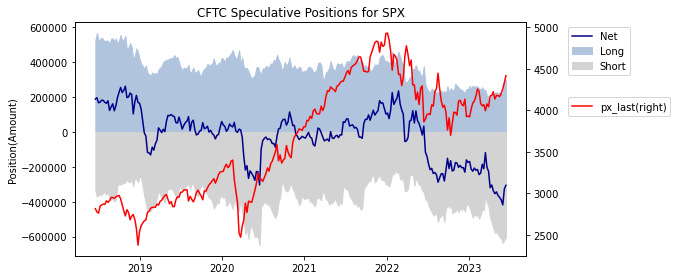

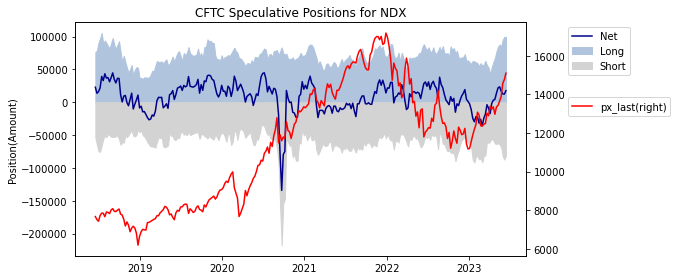

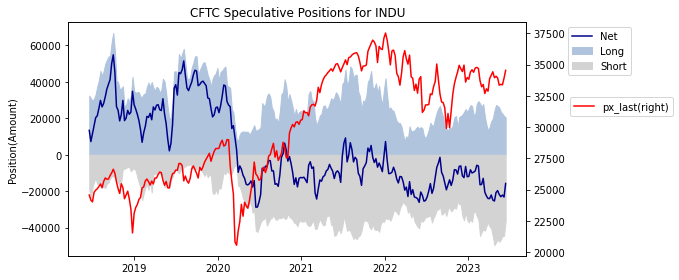

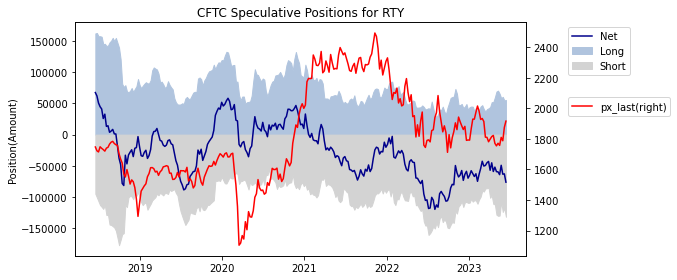

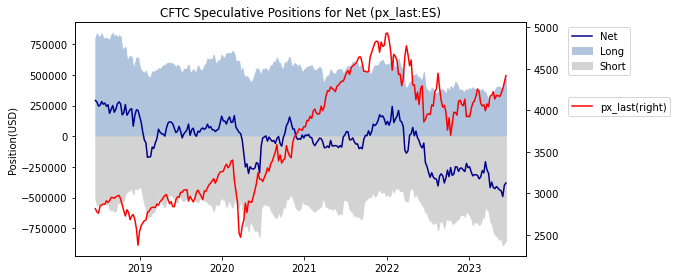

In [8]:
for s in S[:4]:
    CFTC(s)
    
CFTC_Net()